# 结果呈现与分析

In [114]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimSun']  # 中文设定宋体
plt.rcParams['axes.unicode_minus'] = False   # 解决负号 '-' 显示为方块的问题

# 我自己的工具包 用于解决表格呈现问题 
from my_table_util import *  # 见我的github仓库: Greenmilkvvv/econ-utils

def load_results_pickle(filename: str):
    """
    从pickle文件加载结果
    
    Parameters:
    filename: pickle文件名
    
    Returns:
    加载的结果列表
    """
    with open(filename, 'rb') as f:  # 'rb'表示二进制读取
        all_results = pickle.load(f)
    
    print(f"已从 {filename} 加载结果")
    return all_results

## Fama-Macbeth 回归

### 读取结果

In [115]:
filename = "result/fama-macbeth/fama_macbeth_results.pkl"

FM_res = load_results_pickle(filename)

已从 result/fama-macbeth/fama_macbeth_results.pkl 加载结果


In [116]:
FM_res[0].keys()

dict_keys(['results_df', 'test_results', 'portfolio_assignments', 'summary_df'])

In [117]:
print(f"共{len(FM_res)}次结果")

共18次结果


In [21]:
FM_res[0]['summary_df']

,Coefficient,Hypothesis,Mean,Std_Error,t_Statistic,p_Value,Significance,N_Observations,Mean_With_Significance
0,gamma_0,E(γ₀) = 0,-0.005099,0.001023,-4.985521,7.321150e-07,***,968,-0.005099***
1,gamma_1,E(γ₁) > 0,0.000373,0.001708,0.218523,4.135340e-01,,968,0.000373
2,gamma_2,E(γ₂) = 0,0.000010,0.001087,0.009097,9.927438e-01,,968,0.000010
3,gamma_3,E(γ₃) = 0,0.000847,0.002043,0.414434,6.786484e-01,,968,0.000847
4,R_Squared,-,0.181506,0.004222,NaN,NaN,,968,0.181506
5,N_Portfolios,-,20.000000,0.000000,NaN,NaN,,968,20.00


### 方法示例: 2000-2012

In [22]:
res_00_12 = FM_res[5]
res_00_12.keys()

dict_keys(['results_df', 'test_results', 'portfolio_assignments', 'summary_df'])

In [23]:
df_all = pd.read_csv("data/preprocessed/daily_return.csv")[['date', 'code']]
df_all['date'] = pd.to_datetime(df_all['date'])
df_all = df_all[df_all['date'].dt.year.isin(range(2000, 2013))]
print(f"00-12共 {df_all['date'].nunique()} 个交易日")

00-12共 3144 个交易日


In [24]:
print(f"00-12共 {df_all['code'].nunique()} 个股票")

00-12共 2247 个股票


In [22]:
print(f"00-03共 {df_all[df_all['date'].dt.year.isin(range(2000, 2004))]['date'].nunique()} 个交易日")

00-03共 957 个交易日


In [25]:
print(f"04-08共 {df_all[df_all['date'].dt.year.isin(range(2004, 2009))]['date'].nunique()} 个交易日")

04-08共 1214 个交易日


In [ ]:
# 09-12年四年检验数据
print(f"09到12年检验期: {res_00_12['results_df'].shape[0]}个交易日")

09到12年检验期: 973个交易日


In [28]:
print(df_all.head(2)) 
print(df_all.tail(2))

        date  code
0 2000-01-04     2
1 2000-01-05     2
              date    code
5035467 2012-12-28  603993
5035468 2012-12-31  603993


In [29]:
print( df_all[df_all['date'].dt.year.isin(range(2009, 2013))].head(2))
print( df_all[df_all['date'].dt.year.isin(range(2009, 2013))].tail(2))

              date  code
1175246 2009-01-05     2
1175247 2009-01-06     2
              date    code
5035467 2012-12-28  603993
5035468 2012-12-31  603993


In [39]:
res_00_12['summary_df'].columns

Index(['Coefficient', 'Hypothesis', 'Mean', 'Std_Error', 't_Statistic',
       'p_Value', 'Significance', 'N_Observations', 'Mean_With_Significance'],
      dtype='object')

In [43]:
df = res_00_12['summary_df'].copy()[['Coefficient', 'Hypothesis', 'N_Observations', 'Mean', 'Std_Error', 't_Statistic', 'p_Value']].iloc[:4,:]
df.columns = ['系数', '假设', '样本量', '均值', '标准误', 't值', 'p值']
get_LaTeX_table( 
    df, 
    decimal=4,
    caption="00-12年检验结果", 
    label="00_12_result", 
    show_index=False
)

\begin{table}[h!]
\centering
\caption{00-12年检验结果}
\label{tab:00_12_result}
\begin{tabular}{ccccccc}
\toprule
系数 & 假设 & 样本量 & 均值 & 标准误 & t值 & p值 \\
\midrule
gamma_0 & E(γ₀) = 0 & 973 & -0.0093 & 0.0091 & -1.0197 & 0.3081 \\
gamma_1 & E(γ₁) > 0 & 973 & 0.0069 & 0.0178 & 0.3861 & 0.3497 \\
gamma_2 & E(γ₂) = 0 & 973 & -0.0038 & 0.0088 & -0.4308 & 0.6667 \\
gamma_3 & E(γ₃) = 0 & 973 & -0.0035 & 0.0031 & -1.159 & 0.2467 \\
\bottomrule
\end{tabular}
\end{table}


### 全部分析结果

#### 假设检验

In [ ]:
def compare_to_0(val: float): 
    if val>0: 
        return "大于0"
    elif val<0:
        return "小于0"
    else:
        return "等于0"
    
def sig_judge(significance: str, emphasize_insignificant=False):
    if '*' in significance:
        return "显著"
    else:
        if emphasize_insignificant:
            return "不显著"
        else:
            return ""
        
def check_summary(check_df): 
    # 判断字典
    check_res = {} 

    # gamma_0
    if "*" in check_df.loc['gamma_0', 'Significance']:
        check_res['gamma_0'] = "No!"
    else:
        check_res['gamma_0'] = "Yes!"

    # gamma_1
    if check_df.loc['gamma_1', 'Mean'] < 0:
        if "*" in check_df.loc['gamma_1', 'Significance']:
            check_res['gamma_1'] = "No!"
        else:
            check_res['gamma_1'] = "好在不显著, It's alright."
    else: 
        if "*" in check_df.loc['gamma_1', 'Significance']:
            check_res['gamma_1'] = "Yes!"
        else:
            check_res['gamma_1'] = "尽管不显著, It's alright."

    # gamma_2
    if "*" in check_df.loc['gamma_2', 'Significance']:
        check_res['gamma_2'] = "No!" 
    else:
        check_res['gamma_2'] = "Yes!"

    # gamme_3
    if "*" in check_df.loc['gamma_3', 'Significance']:
        check_res['gamma_3'] = "No!"
    else:
        check_res['gamma_3'] = "Yes!"

    return check_res



for i in range(len(FM_res)): 
    check_df = FM_res[i]['summary_df'].iloc[[0,1,2,3],[2,6]]
    check_df.index = ['gamma_0', 'gamma_1', 'gamma_2', 'gamma_3']

    check_res = check_summary(check_df)
    check_res = {key: ", "+val for key, val in check_res.items()}

    print('='*18 + f" {1995+i}年 到 {1995+12+i}年 " + '='*18)
    print(check_df.iloc[[0,1],:])

    print('\n')

    print(f"gamma_0 {sig_judge(significance=check_df.loc['gamma_0', 'Significance'], emphasize_insignificant=True) + check_res['gamma_0']}")
    print(f"gamma_1 {sig_judge(check_df.loc['gamma_1', 'Significance']) +  compare_to_0(check_df.loc['gamma_1', 'Mean']) + check_res['gamma_1']}")
    print(f"gamma_2 {sig_judge(significance=check_df.loc['gamma_2', 'Significance'], emphasize_insignificant=True) + check_res['gamma_2']}")
    print(f"gamma_3 {sig_judge(significance=check_df.loc['gamma_3', 'Significance'], emphasize_insignificant=True) + check_res['gamma_3']}")

    print('=' * len('='*18 + f" {1995+i}年 到 {1995+12+i}年 " + '='*18) )
    print("\n")

================== 1995年 到 2007年 ==================
             Mean Significance
gamma_0 -0.005099          ***
gamma_1  0.000373             


gamma_0 显著, No!
gamma_1 大于0, 尽管不显著, It's alright.
gamma_2 不显著, Yes!
gamma_3 不显著, Yes!


================== 1996年 到 2008年 ==================
             Mean Significance
gamma_0 -0.005012             
gamma_1 -0.003326             


gamma_0 不显著, Yes!
gamma_1 小于0, 好在不显著, It's alright.
gamma_2 不显著, Yes!
gamma_3 不显著, Yes!


================== 1997年 到 2009年 ==================
             Mean Significance
gamma_0  0.000688             
gamma_1 -0.011449            *


gamma_0 不显著, Yes!
gamma_1 显著小于0, No!
gamma_2 不显著, Yes!
gamma_3 不显著, Yes!


================== 1998年 到 2010年 ==================
             Mean Significance
gamma_0  0.003751             
gamma_1 -0.018943             


gamma_0 不显著, Yes!
gamma_1 小于0, 好在不显著, It's alright.
gamma_2 不显著, Yes!
gamma_3 不显著, Yes!


================== 1999年 到 2011年 ==================
             Mean

据此选择
1. **95-07**
2. 96-08
3. 98-10
4. 00-12
5.  **04-16**
6.  **07-19**
7.  08-20
8.  09-21
9.  11-23
10. **12-24**

#### 样本

In [53]:
# 计算整个周期的 样本数 交易日总数
df_all = pd.read_csv("data/preprocessed/daily_return.csv")[['date', 'code']]
df_all['date'] = pd.to_datetime(df_all['date'])
def calculate_sample_count(df, start_year, end_year):
    df = df_all.copy()
    df = df[df['date'].dt.year.isin(range(start_year, end_year+1))]
    return df['date'].nunique(), df['code'].nunique()

for i in [1995, 1996, 1998, 2000, 2004, 2007, 2008, 2009, 2011, 2012]:
    sample_count, trade_day_count = calculate_sample_count(df, i, i+12)
    print(f"{i}年 到 {i+12}年: {sample_count}个交易日, {trade_day_count}个股票")

1995年 到 2007年: 3151个交易日, 1374个股票
1996年 到 2008年: 3146个交易日, 1447个股票
1998年 到 2010年: 3142个交易日, 1851个股票
2000年 到 2012年: 3144个交易日, 2247个股票
2004年 到 2016年: 3158个交易日, 2773个股票
2007年 到 2019年: 3163个交易日, 3470个股票
2008年 到 2020年: 3164个交易日, 3896个股票
2009年 到 2021年: 3161个交易日, 4406个股票
2011年 到 2023年: 3159个交易日, 5128个股票
2012年 到 2024年: 3157个交易日, 5225个股票


#### 表格整理

In [65]:
FM_res[0]['summary_df']

,Coefficient,Hypothesis,Mean,Std_Error,t_Statistic,p_Value,Significance,N_Observations,Mean_With_Significance
0,gamma_0,E(γ₀) = 0,-0.005099,0.001023,-4.985521,7.321150e-07,***,968,-0.005099***
1,gamma_1,E(γ₁) > 0,0.000373,0.001708,0.218523,4.135340e-01,,968,0.000373
2,gamma_2,E(γ₂) = 0,0.000010,0.001087,0.009097,9.927438e-01,,968,0.000010
3,gamma_3,E(γ₃) = 0,0.000847,0.002043,0.414434,6.786484e-01,,968,0.000847
4,R_Squared,-,0.181506,0.004222,NaN,NaN,,968,0.181506
5,N_Portfolios,-,20.000000,0.000000,NaN,NaN,,968,20.00


In [82]:
# 处理 系数
def take_latex_coefficients(df):
    df = df.copy()
    df['Coefficient'] = '$' + '\\' + df['Coefficient'].astype(str) + '$'
    return df

In [101]:
periods = [1995, 1996, 1998, 2000, 2004, 2007, 2008, 2009, 2011, 2012] # 选择的时间段
periods = [x-1995 for x in periods] # 转成对应的索引

all_periods_res = []
for y in periods: 
    df = FM_res[y]['summary_df'].iloc[0:4, [0,2,3,4,5,6]]
    sig = FM_res[y]['summary_df'].iloc[0:4, 6]
    df = take_latex_coefficients(df)
    
    # 将所有都改成四位小数
    df = df.round(4).astype('str')
    df['Mean'] = df['Mean'] + df['Significance']
    df.drop(['Significance'], axis=1, inplace=True)

    df.columns = ['系数', '均值', '标准误', 't值', 'p值']
    

    # 再设一重索引 为 字符串 "1995+y - 1995+y+12"
    df.index = pd.MultiIndex.from_tuples([ (y+1995+9-1, y+1995+12) for x in df.index ])

    all_periods_res.append(df) 

# 将所有结果合并成一个表格
all_periods_res = pd.concat(all_periods_res, axis=0)

get_LaTeX_table(all_periods_res, caption="全周期检验结果", label="FM_all_results", show_index=True)

\begin{table}[h!]
\centering
\caption{全周期检验结果}
\label{tab:FM_all_results}
\begin{tabular}{cccccc}
\toprule
 & 系数 & 均值 & 标准误 & t值 & p值 \\
\midrule
(2003, 2007) & $\gamma_0$ & -0.0051*** & 0.001 & -4.9855 & 0.0 \\
(2003, 2007) & $\gamma_1$ & 0.0004 & 0.0017 & 0.2185 & 0.4135 \\
(2003, 2007) & $\gamma_2$ & 0.0 & 0.0011 & 0.0091 & 0.9927 \\
(2003, 2007) & $\gamma_3$ & 0.0008 & 0.002 & 0.4144 & 0.6786 \\
(2004, 2008) & $\gamma_0$ & -0.005 & 0.0031 & -1.6097 & 0.1078 \\
(2004, 2008) & $\gamma_1$ & -0.0033 & 0.006 & -0.5524 & 0.2904 \\
(2004, 2008) & $\gamma_2$ & 0.0018 & 0.0033 & 0.5404 & 0.589 \\
(2004, 2008) & $\gamma_3$ & -0.0004 & 0.0037 & -0.1019 & 0.9188 \\
(2006, 2010) & $\gamma_0$ & 0.0038 & 0.0119 & 0.3155 & 0.7525 \\
(2006, 2010) & $\gamma_1$ & -0.0189 & 0.023 & -0.8218 & 0.2057 \\
(2006, 2010) & $\gamma_2$ & 0.0091 & 0.0113 & 0.8098 & 0.4183 \\
(2006, 2010) & $\gamma_3$ & 0.0006 & 0.0043 & 0.1375 & 0.8907 \\
(2008, 2012) & $\gamma_0$ & -0.0093 & 0.0091 & -1.0197 & 0.3081 \\
(2008,

In [104]:
# 检查一下检验期间的样本数
for i in periods: 
    print(f"{i+1995}年 到 {i+1995+12}年: {len(FM_res[i]['results_df'])}个数据")

1995年 到 2007年: 968个数据
1996年 到 2008年: 971个数据
1998年 到 2010年: 974个数据
2000年 到 2012年: 973个数据
2004年 到 2016年: 971个数据
2007年 到 2019年: 975个数据
2008年 到 2020年: 974个数据
2009年 到 2021年: 973个数据
2011年 到 2023年: 970个数据
2012年 到 2024年: 969个数据


## Black-Jensen-Scholes 方法

### 读取结果

In [25]:
filename = "result/black-jensen-scholes/black_jensen_scholes_results.pkl"

BJS_res = load_results_pickle(filename)

已从 result/black-jensen-scholes/black_jensen_scholes_results.pkl 加载结果


In [26]:
BJS_res.keys()

dict_keys(['all', '95-03', '02-10', '09-17', '16-24'])

In [27]:
BJS_res['all'].keys()

dict_keys(['portfolio_stats', 'portfolio_betas', 'time_series_results', 'cross_section_results', 'summary_statistics'])

### 时间序列检验

#### 全样本

In [28]:
df_ts_all = pd.DataFrame(BJS_res['all']['time_series_results'])

In [29]:
df_ts_all.columns

Index(['Portfolio_1', 'Portfolio_10', 'Portfolio_2', 'Portfolio_3',
       'Portfolio_4', 'Portfolio_5', 'Portfolio_6', 'Portfolio_7',
       'Portfolio_8', 'Portfolio_9'],
      dtype='object')

In [30]:
ts_all_table = df_ts_all.iloc[0:6, :][ 
    ['Portfolio_1', 'Portfolio_2', 'Portfolio_3',
       'Portfolio_4', 'Portfolio_5', 'Portfolio_6', 'Portfolio_7',
       'Portfolio_8', 'Portfolio_9', 'Portfolio_10']
].astype('float')
ts_all_table.loc['alpha',: ] *= 10**2
ts_all_table.columns = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
get_LaTeX_table(ts_all_table.iloc[:,0:5], decimal=4,  caption="全周期时间序列检验结果", label="BJS_ts_all_results", show_index=True)
print('\n')
get_LaTeX_table(ts_all_table.iloc[:,5:], decimal=4,  caption="全周期时间序列检验结果", label="BJS_ts_all_results", show_index=True)

\begin{table}[h!]
\centering
\caption{全周期时间序列检验结果}
\label{tab:BJS_ts_all_results}
\begin{tabular}{cccccc}
\toprule
 & 1 & 2 & 3 & 4 & 5 \\
\midrule
alpha & 0.0263 & 0.0423 & 0.0687 & 0.0912 & 0.1082 \\
alpha_tstat & 2.0672 & 3.4535 & 5.5763 & 7.1451 & 8.3608 \\
alpha_pvalue & 0.0388 & 0.0006 & 0.0 & 0.0 & 0.0 \\
beta & 0.983 & 1.0045 & 1.0529 & 1.0842 & 1.111 \\
beta_tstat & 123.1112 & 130.9678 & 136.3328 & 135.5325 & 136.921 \\
beta_pvalue & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 \\
\bottomrule
\end{tabular}
\end{table}


\begin{table}[h!]
\centering
\caption{全周期时间序列检验结果}
\label{tab:BJS_ts_all_results}
\begin{tabular}{cccccc}
\toprule
 & 6 & 7 & 8 & 9 & 10 \\
\midrule
alpha & 0.1157 & 0.1278 & 0.1372 & 0.1528 & 0.1539 \\
alpha_tstat & 8.4953 & 9.411 & 9.9026 & 10.6266 & 10.5489 \\
alpha_pvalue & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 \\
beta & 1.1261 & 1.1503 & 1.1659 & 1.1957 & 1.2161 \\
beta_tstat & 131.8757 & 135.1579 & 134.2773 & 132.6276 & 132.9508 \\
beta_pvalue & 0.0 & 0.0 & 0.0 & 0.0 & 0.0 \\
\bott

#### 子样本

In [31]:
ts_res_lst = []
period_lst = ['95-03', '02-10', '09-17', '16-24']

for i in range(len(period_lst)) : 
    period = period_lst[i]
    df = pd.DataFrame(BJS_res[period]['time_series_results']).iloc[0:6, :].loc[ 
        ['beta', 'alpha', 'alpha_tstat', 'alpha_pvalue', ], 
        ['Portfolio_1', 'Portfolio_2', 'Portfolio_3',
        'Portfolio_4', 'Portfolio_5', 'Portfolio_6', 'Portfolio_7',
        'Portfolio_8', 'Portfolio_9', 'Portfolio_10']
    ].astype('float').copy()

    df.loc['alpha',: ] *= 10**2

    df.columns = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']

    df.index = ['$\\hat{\\beta}$', '$\\hat{\\alpha} \cdot 10^2$', '$t(\\hat{\\alpha})$', '$p(\\hat{\\alpha})$']
    df['期数'] = pd.Series([str(i+1)] * len(df.index), index=df.index)
    df.reset_index(inplace=True)
    df = df[ 
        ['index', '期数','1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
    ]
    ts_res_lst.append(df)

# 将所有结果合并成一个表格
ts_res = pd.concat(ts_res_lst, axis=0)
ts_res.sort_values(by=['index', '期数'], inplace=True)
ts_res.set_index('index', inplace=True)

In [32]:
get_LaTeX_table( 
    ts_res, 
    decimal=2, 
    caption="子周期时间序列检验结果",
    label="BJS_ts_results",
    show_index=True
)

\begin{table}[h!]
\centering
\caption{子周期时间序列检验结果}
\label{tab:BJS_ts_results}
\begin{tabular}{cccccccccccc}
\toprule
 & 期数 & 1 & 2 & 3 & 4 & 5 & 6 & 7 & 8 & 9 & 10 \\
\midrule
$\hat{\alpha} \cdot 10^2$ & 1 & -0.05 & -0.03 & -0.0 & 0.0 & 0.03 & 0.02 & 0.04 & 0.04 & 0.06 & 0.02 \\
$\hat{\alpha} \cdot 10^2$ & 2 & 0.1 & 0.1 & 0.15 & 0.18 & 0.21 & 0.24 & 0.24 & 0.24 & 0.27 & 0.29 \\
$\hat{\alpha} \cdot 10^2$ & 3 & 0.09 & 0.14 & 0.14 & 0.18 & 0.18 & 0.18 & 0.19 & 0.2 & 0.2 & 0.18 \\
$\hat{\alpha} \cdot 10^2$ & 4 & 0.08 & 0.04 & 0.06 & 0.06 & 0.09 & 0.12 & 0.13 & 0.16 & 0.18 & 0.17 \\
$\hat{\beta}$ & 1 & 0.94 & 0.96 & 1.01 & 1.02 & 1.06 & 1.07 & 1.08 & 1.1 & 1.13 & 1.11 \\
$\hat{\beta}$ & 2 & 0.91 & 0.93 & 1.01 & 1.04 & 1.07 & 1.08 & 1.11 & 1.11 & 1.14 & 1.17 \\
$\hat{\beta}$ & 3 & 1.1 & 1.15 & 1.19 & 1.22 & 1.23 & 1.25 & 1.26 & 1.28 & 1.29 & 1.31 \\
$\hat{\beta}$ & 4 & 1.1 & 1.02 & 1.06 & 1.08 & 1.13 & 1.19 & 1.22 & 1.28 & 1.33 & 1.37 \\
$p(\hat{\alpha})$ & 1 & 0.0 & 0.0 & 0.92 & 0.87 & 0.01

### 横截面实证

In [33]:
BJS_res['all'].keys()

dict_keys(['portfolio_stats', 'portfolio_betas', 'time_series_results', 'cross_section_results', 'summary_statistics'])

In [34]:
df = pd.DataFrame(BJS_res['all']['cross_section_results']).iloc[0,:]
for period in list(BJS_res.keys())[1:]:
    df = pd.concat([df, pd.DataFrame(BJS_res[period]['cross_section_results']).iloc[0,:]], axis=1)

df = df.iloc[:6 , :].astype('float')
df.columns = ['all', '95-03', '02-10', '09-17', '16-24']
df.index = [ 
    '$\\hat{\\gamma_0}$', '$t(\\hat{\\gamma_0})$', '$p(\\hat{\\gamma_0})$', 
    '$\\hat{\\gamma_1}$', '$t(\\hat{\\gamma_1})$', '$p(\\hat{\\gamma_1})$'
]

get_LaTeX_table(df, decimal=4, caption="横截面检验结果", label="BJS_cs_results", show_index=True)

\begin{table}[h!]
\centering
\caption{横截面检验结果}
\label{tab:BJS_cs_results}
\begin{tabular}{cccccc}
\toprule
 & all & 95-03 & 02-10 & 09-17 & 16-24 \\
\midrule
$\hat{\gamma_0}$ & -0.0053 & -0.0054 & -0.006 & -0.0045 & -0.0037 \\
$t(\hat{\gamma_0})$ & -24.231 & -10.4237 & -13.0828 & -5.398 & -15.6296 \\
$p(\hat{\gamma_0})$ & 0.0 & 0.0 & 0.0 & 0.0006 & 0.0 \\
$\hat{\gamma_1}$ & -0.0 & -0.0003 & 0.0 & 0.0001 & -0.0 \\
$t(\hat{\gamma_1})$ & -0.0733 & -0.5374 & 0.0254 & 0.1665 & -0.0874 \\
$p(\hat{\gamma_1})$ & 0.9433 & 0.6056 & 0.9803 & 0.8719 & 0.9325 \\
\bottomrule
\end{tabular}
\end{table}


## 一些可视化

### 上市公司数量 与 上证周期

In [35]:
# 读取交易数据
df = pd.read_csv("data/preprocessed/daily_return.csv").loc[:,['date','code']]
df['date'] = pd.to_datetime(df['date'])

# 选择 1995 年的数据
count = []
for y in range(1995, 2024+1): 
    count.append( df[df['date'].dt.year == y]['code'].nunique() )

In [36]:
# 上证行情
path = "data/raw/market_yield/上证指数(000001) - 历史行情 - 股票行情中心 - 搜狐证券.xlsx"

df_sz = pd.read_excel(path).dropna().reset_index().iloc[ 1: , [1, 3] ]
df_sz.columns = ['date', 'sz_index']
df_sz['date'] = pd.to_datetime(df_sz['date'])
df_sz.head()

,date,sz_index
1,2024-12-31,3351.76
2,2024-12-30,3407.33
3,2024-12-27,3400.14
4,2024-12-26,3398.08
5,2024-12-25,3393.35


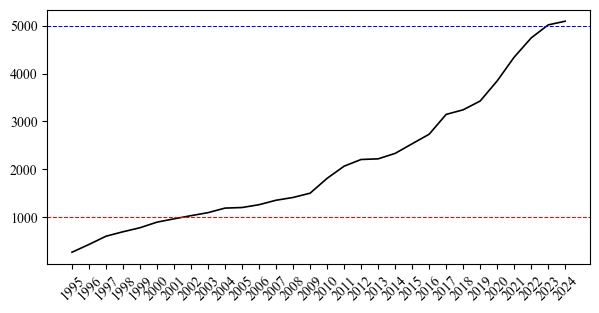

In [11]:
fig, ax = plt.subplots(figsize=(7, 3.3))

### 上市公司数量
# ax.set_title('上市公司数量')
ax.plot(range(1995, 2024+1), count, color='black', linewidth=1.2)
# 在1000处添加横线
ax.axhline(y=1000, color='red', linestyle='--', linewidth=0.75)
ax.axhline(y=5000, color='blue', linestyle='--',  linewidth=0.75)

### 上证指数 选择右侧y轴
# ax2 = ax.twinx()
# ax2.plot(df_sz['date'], df_sz['sz_index'], linewidth=1.2, label = "上证指数")

# 旋转显示横坐标 显示全部
plt.xticks(range(1995, 2024+1), rotation=45)

# 将刻度显示设置为新罗马字体
plt.xticks(fontproperties='Times New Roman')
plt.yticks(fontproperties='Times New Roman')

# fig.savefig("result/conclusion/上市公司数量.pdf", dpi=300, bbox_inches='tight')
plt.show()

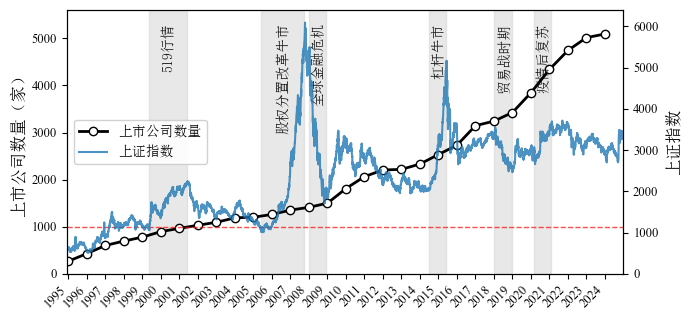

In [37]:
import matplotlib.dates as mdates

# count: 长度30的列表或数组，对应1995-2024年
# df_sz: DataFrame，包含'date'列和'sz_index'列，'date'为datetime类型

fig, ax = plt.subplots(figsize=(7, 3.3))

# ============== 左侧y轴：上市公司数量 ==============
# 将年份转换为datetime格式，以便与上证指数数据对齐
years = pd.date_range(start='1995-01-01', end='2024-12-31', freq='YS')  # 年初

# 确保count数据长度与年份匹配
ax.plot(years, count, color='black', linewidth=2, label='上市公司数量', marker='o', markerfacecolor='white')

# 添加参考线
ax.axhline(y=1000, color='red', linestyle='--', linewidth=1, alpha=0.7)
# ax.axhline(y=5000, color='black', linestyle='--', linewidth=1, alpha=0.7)

# 添加参考线标签
# ax.text(years[0], 1050, '1000家', fontsize=9, va='bottom')
# ax.text(years[0], 5050, '5000家', fontsize=9, va='bottom')

# 设置左侧y轴标签
ax.set_ylabel('上市公司数量（家）', fontsize=12, fontweight='bold', color='black')
ax.tick_params(axis='y', labelcolor='black')

# 设置左侧y轴范围
ax.set_ylim(0, max(count) * 1.1)

# ============== 右侧y轴：上证指数 ==============
ax2 = ax.twinx()

# 确保上证指数数据的时间范围包含1995-2024
# 如果df_sz数据是日频，可以取每年最后一个交易日的数据
# if len(df_sz) > 30:  # 如果是高频数据，需要重采样
#     # 方法1：取每年最后一个观测值
#     df_sz_yearly = df_sz.resample('Y', on='date').last().reset_index()
#     ax2.plot(df_sz_yearly['date'], df_sz_yearly['sz_index'], 
#              linewidth=1.5, label='上证指数', alpha=0.8)
# else:  # 如果已经是年频数据
#     ax2.plot(df_sz['date'], df_sz['sz_index'], 
#              linewidth=1.5, label='上证指数', alpha=0.8)
ax2.plot(df_sz['date'], df_sz['sz_index'],
         linewidth=1.5, label='上证指数', alpha=0.8)

# 设置右侧y轴标签
ax2.set_ylabel('上证指数', fontsize=12, fontweight='bold', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# 设置右侧y轴范围
ax2.set_ylim(0, max(df_sz['sz_index']) * 1.05)

# ============== 添加阴影区域标记重要时期 ==============
# 用半透明阴影标记重要市场时期
important_periods = [
    (pd.Timestamp('1999-05-01'), pd.Timestamp('2001-06-01'), '519行情', 0.5, 'lightgray'),
    (pd.Timestamp('2005-06-01'), pd.Timestamp('2007-10-01'), '股权分置改革牛市', 0.5, 'lightgray'),
    (pd.Timestamp('2008-01-01'), pd.Timestamp('2008-12-01'), '全球金融危机', 0.5, 'lightgray'),
    (pd.Timestamp('2014-07-01'), pd.Timestamp('2015-06-01'), '杠杆牛市', 0.5, 'lightgray'),
    (pd.Timestamp('2018-01-01'), pd.Timestamp('2019-01-01'), '贸易战时期', 0.5, 'lightgray'),
    (pd.Timestamp('2020-03-01'), pd.Timestamp('2021-02-01'), '疫情后复苏', 0.5, 'lightgray'),
]

for start, end, label, alpha, color in important_periods:
    ax.axvspan(start, end, alpha=alpha, color=color)
    # 在中间位置添加标签
    mid_date = start + (end - start) / 2
    ax.text(mid_date, ax.get_ylim()[1] * 0.95, label, 
           ha='center', va='top', fontsize=10, rotation=90, alpha=0.9)

# ============== x轴设置 ==============
# 设置x轴为年份格式
ax.xaxis.set_major_locator(mdates.YearLocator(1))  # 每5年一个主刻度
# ax.xaxis.set_minor_locator(mdates.YearLocator(1))  # 每年一个次刻度

# 设置x轴标签格式
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# 旋转x轴标签
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')

# 设置x轴范围
ax.set_xlim(pd.Timestamp('1994-12-01'), pd.Timestamp('2024-12-31'))

# ============== 网格和标题 ==============
# 添加网格
# ax.grid(True, alpha=0.3, linestyle='--', which='both')

# 添加图例
# 由于双y轴，需要分别获取句柄和标签
lines1, labels1 = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines1 + lines2, labels1 + labels2, 
          loc='center left', fontsize=10, framealpha=0.9)

# 添加标题
# ax.set_title('中国A股市场上市公司数量与上证指数走势（1995-2024）', 
#              fontsize=12, fontweight='bold', pad=15)

# ============== 美观调整 ==============
# 设置刻度字体
for label in ax.get_xticklabels() + ax.get_yticklabels() + ax2.get_yticklabels():
    label.set_fontname('Times New Roman')
    label.set_fontsize(9)

# 调整布局
plt.tight_layout()

# 保存图片
plt.savefig("result/conclusion/上市公司数量与上证指数.pdf", 
            dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

### CAPM

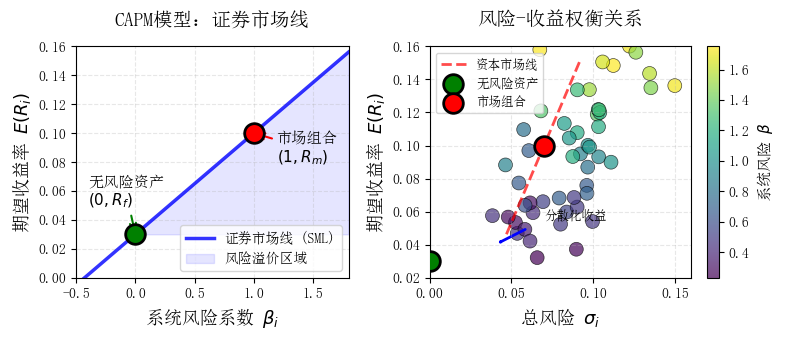

图片已保存为'CAPM_visualization.pdf'


In [38]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.patches import FancyArrowPatch
from scipy import stats

# # 设置中文字体和样式
# plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei', 'DejaVu Sans']
# plt.rcParams['axes.unicode_minus'] = False
# plt.rcParams['axes.spines.top'] = False
# plt.rcParams['axes.spines.right'] = False

# 创建图形
fig, ax = plt.subplots( 
    1, 2, figsize=(8, 3.5),
    gridspec_kw={'width_ratios': [1, 1.2]}
)

# ====================== 左图：证券市场线 (SML) ======================
ax1 = ax[0]

# 定义参数
rf = 0.03  # 无风险利率
rm = 0.10  # 市场组合期望收益率
beta_m = 1.0  # 市场组合的beta

# 计算市场风险溢价
market_risk_premium = rm - rf

# 生成证券市场线
beta_values = np.linspace(-0.5, 1.8, 100)
expected_returns = rf + beta_values * market_risk_premium

# 绘制SML
ax1.plot(beta_values, expected_returns, 'b-', linewidth=2.5, alpha=0.8, label='证券市场线 (SML)')

# 标记关键点
# 无风险资产
ax1.scatter(0, rf, s=200, color='green', edgecolors='black', linewidth=2, zorder=5)
ax1.annotate('无风险资产\n$(0, R_f)$', xy=(0, rf), xytext=(-0.4, rf+0.02),
            arrowprops=dict(arrowstyle='->', color='green', lw=1.5),
            fontsize=11, fontweight='bold')

# 市场组合
ax1.scatter(beta_m, rm, s=200, color='red', edgecolors='black', linewidth=2, zorder=5)
ax1.annotate('市场组合\n$(1, R_m)$', xy=(beta_m, rm), xytext=(1.2, rm-0.02),
            arrowprops=dict(arrowstyle='->', color='red', lw=1.5),
            fontsize=11, fontweight='bold')

# # 标记几个示例资产
# sample_betas = [0.4, 0.7, 1.2, 1.5]
# sample_names = ['防御型资产', '稳健型资产', '激进型资产', '高贝塔资产']
# colors = ['orange', 'purple', 'brown', 'darkcyan']

# for i, (beta, name, color) in enumerate(zip(sample_betas, sample_names, colors)):
#     exp_return = rf + beta * market_risk_premium
#     ax1.scatter(beta, exp_return, s=150, color=color, edgecolors='black', 
#                linewidth=1.5, zorder=5, alpha=0.8)
    
#     # 添加连线到SML（显示alpha）
#     ax1.plot([beta, beta], [exp_return, exp_return], 'k--', alpha=0.5)
    
#     # 资产标注
#     offset_x = 0.05 if i % 2 == 0 else -0.1
#     offset_y = 0.01 if i % 2 == 0 else -0.01
#     ax1.annotate(f'{name}\n$\\beta={beta}$', 
#                 xy=(beta, exp_return), 
#                 xytext=(beta+offset_x, exp_return+offset_y),
#                 arrowprops=dict(arrowstyle='->', color=color, lw=1, alpha=0.7),
#                 fontsize=9, fontweight='bold', bbox=dict(boxstyle="round,pad=0.3", 
#                                                          facecolor=color, alpha=0.1))

# 标记alpha区域（错误定价）
# 假设一个被低估的资产
# underpriced_beta = 0.9
# underpriced_return = rf + underpriced_beta * market_risk_premium + 0.02
# ax1.scatter(underpriced_beta, underpriced_return, s=180, color='limegreen', 
#            edgecolors='darkgreen', linewidth=2, zorder=6, marker='^')
# ax1.annotate('被低估资产\n(正α)', xy=(underpriced_beta, underpriced_return), 
#             xytext=(underpriced_beta+0.1, underpriced_return+0.02),
#             arrowprops=dict(arrowstyle='->', color='darkgreen', lw=1.5),
#             fontsize=10, fontweight='bold')

# 填充SML下方的区域（风险溢价）
x_fill = np.linspace(0, 1.8, 100)
y_fill = rf + x_fill * market_risk_premium
ax1.fill_between(x_fill, rf, y_fill, alpha=0.1, color='blue', 
                label='风险溢价区域')

# 添加公式标注
# formula_text = r'$E(R_i) = R_f + \beta_i \times [E(R_m) - R_f]$'
# ax1.text(0.05, 0.95, formula_text, transform=ax1.transAxes, fontsize=12,
#         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

# 设置坐标轴
ax1.set_xlabel('系统风险系数 $\\beta_i$', fontsize=13, fontweight='bold')
ax1.set_ylabel('期望收益率 $E(R_i)$', fontsize=13, fontweight='bold')
ax1.set_title('CAPM模型：证券市场线', fontsize=14, fontweight='bold', pad=15)
ax1.grid(True, alpha=0.3, linestyle='--')
ax1.legend(loc='lower right', fontsize=10)
ax1.set_xlim([-0.5, 1.8])
ax1.set_ylim([0, 0.16])

# ====================== 右图：风险-收益关系 ======================
ax2 = ax[1]

# 生成模拟数据：总风险 vs 系统风险
np.random.seed(42)
n_assets = 50

# 生成系统风险 (beta)
betas = np.random.uniform(0.2, 1.8, n_assets)

# 生成总风险（包括系统风险和非系统风险）
total_risk = 0.05 + 0.04 * betas + np.random.randn(n_assets) * 0.02
total_risk = np.clip(total_risk, 0.03, 0.15)

# 计算期望收益率（根据CAPM）
expected_returns_assets = rf + betas * market_risk_premium
# 添加一些随机扰动（模拟现实中的偏差）
expected_returns_assets += np.random.randn(n_assets) * 0.01

# 创建散点图，颜色表示beta值
scatter = ax2.scatter(total_risk, expected_returns_assets, 
                     c=betas, cmap='viridis', s=100, alpha=0.7, 
                     edgecolors='black', linewidth=0.5)

# 添加颜色条
cbar = plt.colorbar(scatter, ax=ax2)
cbar.set_label('系统风险 $\\beta$', fontsize=11)

# 添加最优投资组合线（CAL/CML的简化表示）
cal_betas = np.array([min(betas), max(betas)])
cal_returns = rf + cal_betas * market_risk_premium
cal_risk = 0.04 + 0.03 * cal_betas  # 简化模型

ax2.plot(cal_risk, cal_returns, 'r--', linewidth=2, alpha=0.7, label='资本市场线')

# 标记无风险资产和市场组合
ax2.scatter(0, rf, s=200, color='green', edgecolors='black', 
           linewidth=2, zorder=5, label='无风险资产')
ax2.scatter(0.07, rm, s=200, color='red', edgecolors='black', 
           linewidth=2, zorder=5, label='市场组合')

# 添加箭头和标注
# 分散化收益箭头
arrow = FancyArrowPatch((0.06, 0.05), (0.04, 0.04), 
                       arrowstyle='->', color='blue', linewidth=2)
ax2.add_patch(arrow)
ax2.text(0.07, 0.055, '分散化收益', fontsize=9, fontweight='bold')

# 设置坐标轴
ax2.set_xlabel('总风险 $\\sigma_i$', fontsize=13, fontweight='bold')
ax2.set_ylabel('期望收益率 $E(R_i)$', fontsize=13, fontweight='bold')
ax2.set_title('风险-收益权衡关系', fontsize=14, fontweight='bold', pad=15)
ax2.grid(True, alpha=0.3, linestyle='--')
ax2.legend(loc='upper left', fontsize=9)
ax2.set_xlim([0, 0.16])
ax2.set_ylim([0.02, 0.16])

# 添加理论解释文本框
# theory_text = """
# 理论要点：
# 1. 只有系统风险($\\beta$)获得补偿
# 2. 非系统风险可通过分散化消除
# 3. 所有有效组合位于SML上
# 4. 偏离SML意味着错误定价
# """
# ax2.text(0.02, 0.98, theory_text, transform=ax2.transAxes, fontsize=9,
#         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8))

# 调整布局
plt.tight_layout()

# 保存图片
# plt.savefig('CAPM_visualization.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.savefig('result/conclusion/CAPM_visualization.pdf', dpi=300, bbox_inches='tight', facecolor='white')

plt.show()

print("图片已保存为'CAPM_visualization.pdf'")

### BJS-资本市场线

In [55]:
BJS_res[period]['cross_section_results']['gamma_0']

-0.0036986787819862843

In [53]:
def get_info_needed(period, data=BJS_res):
    df = data[period]['cross_section_results']
    gamma_0 = df['gamma_0']
    gamma_1 = df['gamma_1']
    gamma_0_std_err = df['gamma_0'] / df['gamma_0_tstat']
    gamma_1_std_err = df['gamma_1'] / df['gamma_1_tstat']

    stats = pd.DataFrame(data[period]['cross_section_results']['portfolio_stats']).iloc[ 
        [0,2,3,4,5,6,7,8,9,2], 
        [1,3]
    ]
    portfolio_excess_returns = list(stats['return'])
    portfolio_betas = list(stats['beta'])
    return gamma_0, gamma_1, portfolio_excess_returns, portfolio_betas, gamma_0_std_err, gamma_1_std_err

#### 全周期

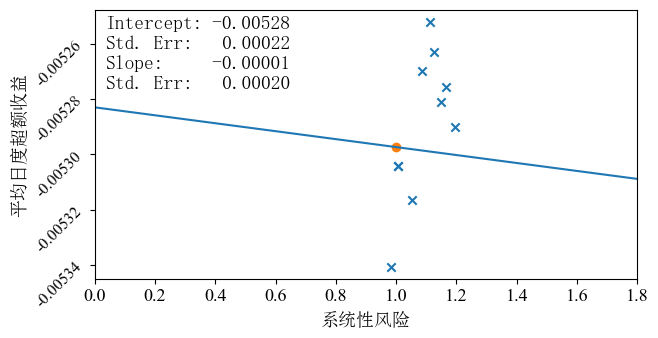

In [113]:
gamma_0, gamma_1, portfolio_excess_returns, portfolio_betas, gamma_0_std_err, gamma_1_std_err = get_info_needed('all')

fig, ax = plt.subplots(figsize=(7, 3.5))

x = np.linspace(0, 1.8, 100)
y = gamma_0 + gamma_1 * x

ax.plot(x, y, label='资本市场线')
# x轴从0开始
ax.set_xlim([0, 1.8])
# ax.set_ylim([-0.005, 0.0025])

ax.scatter(portfolio_betas, portfolio_excess_returns, marker='x')
ax.scatter(1, gamma_0 + gamma_1 * 1, marker='o', label='无风险资产')

ax.set_xlim([0, 1.8])

ax.tick_params(axis='x', labelsize=13)
ax.tick_params(axis='y', labelsize=11.5, rotation=45)
ax.set_xlabel('系统性风险', fontsize=13)
ax.set_ylabel('平均日度超额收益', fontsize=13)

ax.text(
    0.02, 0.98,
    f'Intercept: {gamma_0:.5f}\nStd. Err:   {gamma_0_std_err:.5f}\nSlope:     {gamma_1:.5f}\nStd. Err:   {gamma_1_std_err:.5f}',
    transform=ax.transAxes,        
    fontsize=14, 
    va='top',
    ha='left'
)

# 设置刻度字体
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontname('Times New Roman')

fig.savefig('result/conclusion/全样本SML.pdf', dpi=300, bbox_inches='tight', facecolor='white')

plt.show()

#### 子周期

In [49]:
BJS_res.keys()

dict_keys(['all', '95-03', '02-10', '09-17', '16-24'])

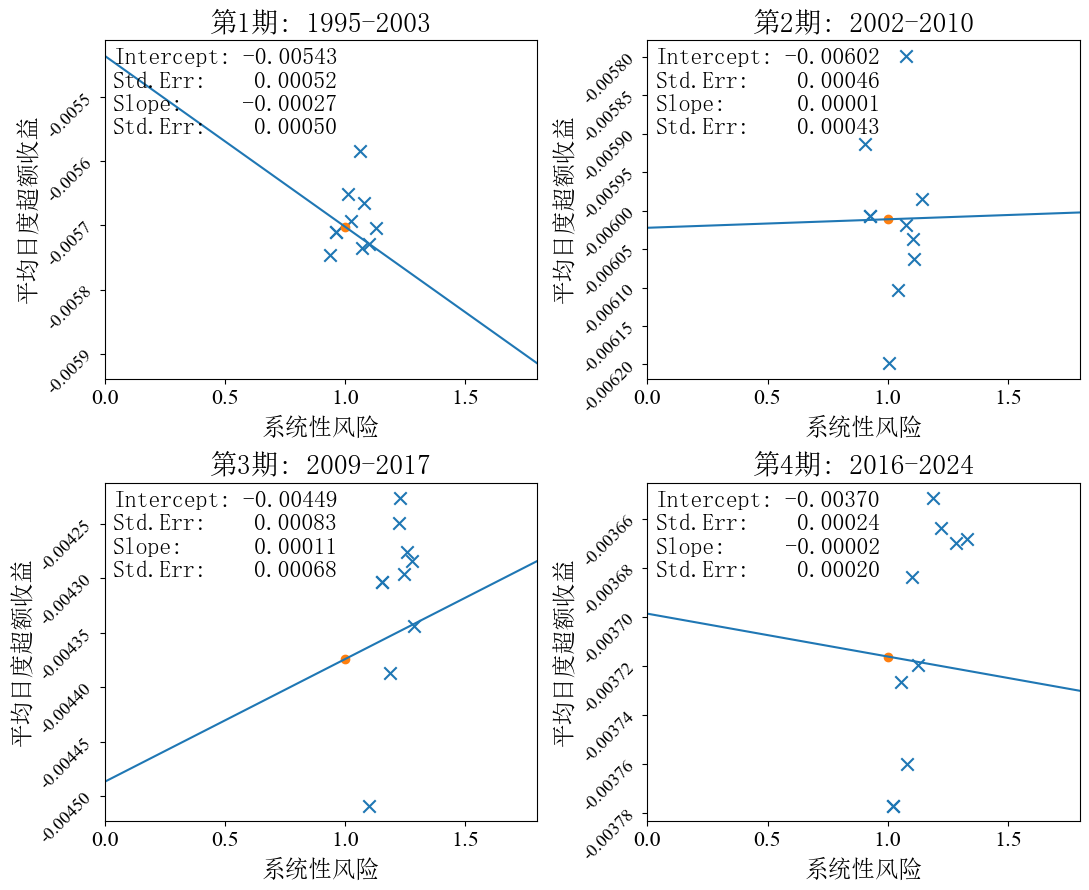

In [132]:
title = ['1995-2003', '2002-2010', '2009-2017', '2016-2024']

fig, axes = plt.subplots(2,2, figsize=(11,9), layout='tight')

skip = { 
    '95-03': "",
    '02-10': " ",
    '09-17': " ",
    '16-24': ""
}
for i, period in enumerate( ['95-03', '02-10', '09-17', '16-24'] ): 
    gamma_0, gamma_1, portfolio_excess_returns, portfolio_betas, gamma_0_std_err, gamma_1_std_err = get_info_needed(period)

    ax = axes[i//2, i%2]

    x = np.linspace(0, 1.8, 100)
    y = gamma_0 + gamma_1 * x

    ax.plot(x, y, label='资本市场线')
    # ax.set_ylim([-0.02, 0.11])
    ax.set_xlim([0, 1.8])
    ax.scatter(portfolio_betas, portfolio_excess_returns, marker='x', s=80)
    ax.scatter(1, gamma_0 + gamma_1 * 1, marker='o', label='无风险资产')
    # 设置
    ax.set_title(f"第{i+1}期: {title[i]}", fontsize=20)
    # ax.xticks(fontsize=15)
    # ax.yticks(fontsize=15)
    ax.tick_params(axis='x', labelsize=16)
    ax.tick_params(axis='y', labelsize=13, rotation=45)
    ax.set_xlabel('系统性风险', fontsize=17)
    ax.set_ylabel('平均日度超额收益', fontsize=17)

    ax.text(
        0.02, 0.98,
        f'Intercept: {gamma_0:.5f}\nStd.Err:    {gamma_0_std_err:.5f}\nSlope:{skip[period]}     {gamma_1:.5f}\nStd.Err:    {gamma_1_std_err:.5f}',
        transform=ax.transAxes,        
        fontsize=17, 
        va='top',
        ha='left'
    )


    # 设置刻度字体
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontname('Times New Roman')

fig.savefig('result/conclusion/子样本SML.pdf', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()
